<a href="https://colab.research.google.com/github/Sandeepkumar214/-Healthcare-Camp-Audience-Prediction-Classification-/blob/main/Health_care_comptition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# test happen at the camp
# Spending awarenes by visiting
#


### Problem Statement
Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.



### The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.


Other things to note:
Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

### Favorable outcome:
For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns',100)


In [ ]:
train=pd.read_csv('/content/Train.csv')
hc=pd.read_csv('/content/Health_Camp_Detail.csv')
fhc=pd.read_csv('/content/First_Health_Camp_Attended.csv')
shc=pd.read_csv('/content/Second_Health_Camp_Attended.csv')
thc=pd.read_csv('/content/Third_Health_Camp_Attended.csv')
pp=pd.read_csv('/content/Patient_Profile.csv')
test=pd.read_csv('/content/test_l0Auv8Q.csv')

In [ ]:
train.shape,hc.shape,fhc.shape,shc.shape,thc.shape,pp.shape,test.shape

((75278, 8), (65, 6), (6218, 5), (7819, 3), (6515, 4), (37633, 11), (35249, 8))

In [ ]:
# train and test combined
combined=pd.concat([train,test],ignore_index=True)

In [ ]:
combined.columns,hc.columns

(Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
        'Var3', 'Var4', 'Var5'],
       dtype='object'),
 Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
        'Category2', 'Category3'],
       dtype='object'))

In [ ]:
combined=pd.merge(combined,pp,how='left',on=['Patient_ID'])
combined=pd.merge(combined,fhc,how='left',on=['Patient_ID','Health_Camp_ID'])
combined=pd.merge(combined,shc,how='left',on=['Patient_ID','Health_Camp_ID'])
combined=pd.merge(combined,thc,how='left',on=['Patient_ID','Health_Camp_ID'])
combined=pd.merge(combined,hc,how='left',on=['Health_Camp_ID'])




In [ ]:
combined.shape

(110527, 29)

In [ ]:
combined.head(5)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [ ]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Health_Score',
       'Health Score', 'Number_of_stall_visited', 'Last_Stall_Visited_Number',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3'],
      dtype='object')

In [ ]:
combined.drop(columns=['Unnamed: 4','Donation'],inplace=True)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 110527 non-null  int64  
 1   Health_Camp_ID             110527 non-null  int64  
 2   Registration_Date          110193 non-null  object 
 3   Var1                       110527 non-null  int64  
 4   Var2                       110527 non-null  int64  
 5   Var3                       110527 non-null  int64  
 6   Var4                       110527 non-null  int64  
 7   Var5                       110527 non-null  int64  
 8   Online_Follower            110527 non-null  int64  
 9   LinkedIn_Shared            110527 non-null  int64  
 10  Twitter_Shared             110527 non-null  int64  
 11  Facebook_Shared            110527 non-null  int64  
 12  Income                     29185 non-null   float64
 13  Education_Score            12

In [ ]:
import warnings
warnings.filterwarnings('ignore')

combined['Registration_Date']=pd.to_datetime(combined['Registration_Date'],dayfirst=True)

In [ ]:
combined['Registration_Day']=combined['Registration_Date'].dt.day
combined['Registration_Day'].value_counts(normalize=True)

Registration_Day
18.0    0.045929
17.0    0.042008
19.0    0.039231
3.0     0.037870
28.0    0.036028
24.0    0.035774
2.0     0.034285
21.0    0.033450
11.0    0.032933
1.0     0.032924
20.0    0.032634
14.0    0.032334
25.0    0.032153
26.0    0.031998
15.0    0.031998
23.0    0.031590
12.0    0.031481
4.0     0.031354
5.0     0.030791
16.0    0.030683
10.0    0.030574
13.0    0.030447
6.0     0.029920
27.0    0.029203
22.0    0.028840
29.0    0.028840
30.0    0.028332
8.0     0.027960
7.0     0.027742
9.0     0.026172
31.0    0.024521
Name: proportion, dtype: float64

In [ ]:
combined['Registration_Month']=combined['Registration_Date'].dt.month
combined['Registration_Month'].value_counts(normalize=True)

Registration_Month
9.0     0.102738
6.0     0.100569
5.0     0.095714
8.0     0.087229
12.0    0.087229
10.0    0.085604
1.0     0.083336
11.0    0.079016
7.0     0.076783
3.0     0.069705
2.0     0.066592
4.0     0.065485
Name: proportion, dtype: float64

In [ ]:
combined['Registration_Year']=combined['Registration_Date'].dt.year
combined['Registration_Year'].value_counts(normalize=True)

Registration_Year
2006.0    0.437796
2005.0    0.327326
2004.0    0.172751
2007.0    0.034313
2003.0    0.027815
Name: proportion, dtype: float64

In [ ]:
# First_Interaction ,Camp_Start_Date ,Camp_End_Date

combined['First_Interaction']=pd.to_datetime(combined['First_Interaction'],dayfirst=True)
combined['Camp_Start_Date']=pd.to_datetime(combined['Camp_Start_Date'],dayfirst=True)
combined['Camp_End_Date']=pd.to_datetime(combined['Camp_End_Date'],dayfirst=True)

In [ ]:
# 1 jan 1900 day count value store
# First interaction vs Registration

combined['First_Int_Days']=(combined['Registration_Date']-combined['First_Interaction']).dt.days

In [ ]:
combined['Camp_Duration']=(combined['Camp_End_Date']-combined['Camp_Start_Date']).dt.days

In [ ]:
# wait timee since registration

combined['wait_time_RD']=np.abs((combined['Camp_Start_Date']-combined['Registration_Date']).dt.days)

In [ ]:
# wait timee since first intrectraion date

combined['wait_time_FI']=np.abs((combined['Camp_Start_Date']-combined['First_Interaction']).dt.days)

In [ ]:
# Total duaration

combined['Total_duration']=np.abs((combined['Camp_End_Date']-combined['First_Interaction']).dt.days)

In [ ]:
# Total duaration after reg

combined['wait_time_EndRD']=np.abs((combined['Camp_End_Date']-combined['Registration_Date']).dt.days)

In [ ]:
combined.drop(columns=('duration_af_reg'),inplace=True)

In [ ]:
combined['Patient_ID'].value_counts(normalize=True)

Patient_ID
513633    0.000362
490196    0.000362
509188    0.000353
499917    0.000353
522928    0.000335
            ...   
498099    0.000009
508962    0.000009
506809    0.000009
495293    0.000009
496733    0.000009
Name: proportion, Length: 36692, dtype: float64

In [ ]:
combined['Patient_ID'].nunique(),combined['Health_Camp_ID'].nunique()

(36692, 65)

In [ ]:
# no of patients registering per day/month /year

combined['Patient_Reg_Per_Day']=combined.groupby('Patient_ID')['Registration_Day'].transform('nunique')
combined['Patient_Reg_Per_Month']=combined.groupby('Patient_ID')['Registration_Month'].transform('nunique')
combined['Patient_Reg_Per_Year']=combined.groupby('Patient_ID')['Registration_Year'].transform('nunique')

In [ ]:
combined.shape

(110527, 39)

In [ ]:
combined.head(5)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Registration_Day,Registration_Month,Registration_Year,First_Int_Days,Camp_Duration,wait_time_RD,Total_duration,wait_time_FI,wait_time_EndRD,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,10.0,9.0,2005.0,278.0,59,25.0,312,253,34.0,9,7,3
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,C,Others,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,18.0,8.0,2005.0,344.0,59,2.0,401,342,57.0,16,12,4
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,29.0,4.0,2006.0,676.0,751,194.0,1233,482,557.0,5,4,2
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,7.0,2.0,2004.0,0.0,17,6.0,11,6,11.0,4,4,3
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,2003-07-04,I,Technology,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,28.0,2.0,2006.0,970.0,4,30.0,1004,1000,34.0,17,9,4


In [ ]:
combined['Patient_Reg_Per_Day']=combined.groupby('Patient_ID')['Registration_Day'].transform('nunique')
combined['Patient_Reg_Per_Month']=combined.groupby('Patient_ID')['Registration_Month'].transform('nunique')
combined['Patient_Reg_Per_Year']=combined.groupby('Patient_ID')['Registration_Year'].transform('nunique')

(16258,)

In [ ]:
#Patients in health camp
combined['Patient_Per_HC'] = combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')

In [ ]:

# Social Media Profile
combined['Social+Media'] = combined['Online_Follower'] + combined['Facebook_Shared'] + combined['Twitter_Shared'] + combined['LinkedIn_Shared']

In [ ]:
combined.loc[combined['City_Type'].isnull(),'City_Type']='Unk'

In [ ]:
combined['City_Type']=pd.Series(pd.factorize(combined.City_Type)[0])

In [ ]:
combined['Category1'].unique()

array(['Third', 'Second', 'First'], dtype=object)

In [ ]:
mapp={'Third':3, 'Second':2, 'First':1}
combined['Category1']=combined['Category1'].map(mapp)

In [ ]:
combined['Category2']=pd.Series(pd.factorize(combined['Category2'])[0])

In [ ]:
combined.head(3)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Registration_Day,Registration_Month,Registration_Year,First_Int_Days,Camp_Duration,wait_time_RD,Total_duration,wait_time_FI,wait_time_EndRD,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year,Patient_Per_HC,Social+Media
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,0,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,0,2,10.0,9.0,2005.0,278.0,59,25.0,312,253,34.0,9,7,3,2837,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,1,Others,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,0,2,18.0,8.0,2005.0,344.0,59,2.0,401,342,57.0,16,12,4,2837,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,0,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,1,2,29.0,4.0,2006.0,676.0,751,194.0,1233,482,557.0,5,4,2,3597,0


In [ ]:
combined['Employer_Category'].value_counts(normalize=True)*100

Employer_Category
Technology           22.244940
Software Industry    15.017379
Others               15.012267
Consulting           14.081987
Education             7.600695
BFSI                  5.714578
Retail                3.613780
Manufacturing         3.404212
Health                3.031077
Transport             2.514823
Real Estate           2.361480
Food                  2.203026
Telecom               1.891229
Broadcasting          1.308526
Name: proportion, dtype: float64

In [ ]:
combined['Employer_Category']=pd.Series(pd.factorize(combined['Employer_Category'])[0])

In [ ]:
combined.head(4)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Registration_Day,Registration_Month,Registration_Year,First_Int_Days,Camp_Duration,wait_time_RD,Total_duration,wait_time_FI,wait_time_EndRD,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year,Patient_Per_HC,Social+Media
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,0,-1,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,3,0,2,10.0,9.0,2005.0,278.0,59,25.0,312,253,34.0,9,7,3,2837,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,2004-09-08,1,0,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,3,0,2,18.0,8.0,2005.0,344.0,59,2.0,401,342,57.0,16,12,4,2837,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,0,-1,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,2,1,2,29.0,4.0,2006.0,676.0,751,194.0,1233,482,557.0,5,4,2,3597,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,2,-1,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,1,2,2,7.0,2.0,2004.0,0.0,17,6.0,11,6,11.0,4,4,3,1882,0


In [ ]:
combined.loc[:,['Income','Education_Score','Age']].isnull().sum()

Income             81342
Education_Score    98167
Age                77925
dtype: int64

In [ ]:
for i in ['Income','Education_Score','Age']:
  print(i)
  print(combined[i].value_counts(normalize=True)*100)

Income
Income
0.0    40.839472
1.0    24.437211
2.0    17.848210
3.0     9.347267
4.0     4.488607
5.0     1.939352
6.0     1.099880
Name: proportion, dtype: float64
Education_Score
Education_Score
82.000000     4.757282
79.000000     4.231392
75.000000     4.190939
86.000000     3.689320
76.000000     3.681230
                ...   
81.750000     0.008091
101.000000    0.008091
78.433333     0.008091
73.575000     0.008091
79.473333     0.008091
Name: proportion, Length: 227, dtype: float64
Age
Age
41.0    7.876817
40.0    7.321637
42.0    6.711245
43.0    6.484265
39.0    6.263419
44.0    5.827863
37.0    4.545733
45.0    4.438378
38.0    4.340225
46.0    4.100975
47.0    3.597939
72.0    3.567266
73.0    3.349488
48.0    2.923134
49.0    2.739096
74.0    2.677750
71.0    2.644010
36.0    2.251396
70.0    1.779032
50.0    1.763695
52.0    1.733023
51.0    1.711551
35.0    1.484571
53.0    1.233053
54.0    0.941660
34.0    0.926324
56.0    0.791362
75.0    0.772959
55.0    0.595056
69

In [ ]:
# health_score and stall visit
combined.columns
# 'Health_Score',
#        'Health Score', 'Number_of_stall_visited', 'Last_Stall_Visited_Number'

def target(a,b,c,d):
  if (a>0)|(b>0)|(c>0)|(d>0):
    return 1
  else :
    return 0

In [ ]:
#Creation of target column :
combined['target'] = combined.apply(lambda x : target(x['Health_Score'],x['Health Score'],
                                 x['Number_of_stall_visited'],
                                 x['Last_Stall_Visited_Number']),axis=1)

In [ ]:
combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Health_Score',
       'Health Score', 'Number_of_stall_visited', 'Last_Stall_Visited_Number',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Registration_Day', 'Registration_Month',
       'Registration_Year', 'First_Int_Days', 'Camp_Duration', 'wait_time_RD',
       'Total_duration', 'wait_time_FI', 'wait_time_EndRD',
       'Patient_Reg_Per_Day', 'Patient_Reg_Per_Month', 'Patient_Reg_Per_Year',
       'Patient_Per_HC', 'Social+Media', 'target'],
      dtype='object')

In [ ]:
combined['target'].value_counts(normalize=True)*100

target
0    81.421734
1    18.578266
Name: proportion, dtype: float64

In [ ]:
combined.drop(columns=['Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared','Facebook_Shared', 'Income','Education_Score','Age','Health Score','Health_Score', 'Number_of_stall_visited', 'Last_Stall_Visited_Number']
              ,inplace=True)

In [ ]:
combined.shape

(110527, 31)

In [ ]:
combined.isnull().sum()[combined.isnull().sum()>0].index

Index([], dtype='object')

In [ ]:
combined.drop(columns=(['Registration_Date', 'Registration_Day', 'Registration_Month',
       'Registration_Year', 'First_Int_Days', 'wait_time_RD',
       'wait_time_EndRD']),inplace=True)

In [ ]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration,Total_duration,wait_time_FI,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year,Patient_Per_HC,Social+Media,target
0,489652,6578,4,0,0,0,2,2004-12-06,0,-1,2005-08-16,2005-10-14,3,0,2,59,312,253,9,7,3,2837,0,1
1,507246,6578,45,5,0,0,7,2004-09-08,1,0,2005-08-16,2005-10-14,3,0,2,59,401,342,16,12,4,2837,0,0


In [ ]:
combined.drop(columns=(['Patient_ID','Health_Camp_ID','Camp_Start_Date', 'Camp_End_Date',]),inplace=True)


In [ ]:
combined.drop(columns=(['First_Interaction']),inplace=True)

In [ ]:
combined.head()

,Var1,Var2,Var3,Var4,Var5,City_Type,Employer_Category,Category1,Category2,Category3,Camp_Duration,Total_duration,wait_time_FI,Patient_Reg_Per_Day,Patient_Reg_Per_Month,Patient_Reg_Per_Year,Patient_Per_HC,Social+Media,target
0,4,0,0,0,2,0,-1,3,0,2,59,312,253,9,7,3,2837,0,1
1,45,5,0,0,7,1,0,3,0,2,59,401,342,16,12,4,2837,0,0
2,0,0,0,0,0,0,-1,2,1,2,751,1233,482,5,4,2,3597,0,1
3,0,0,0,0,0,2,-1,1,2,2,17,11,6,4,4,3,1882,0,0
4,15,1,0,0,7,2,1,2,1,2,4,1004,1000,17,9,4,3823,1,1


In [ ]:
#split data into train and test
newtrain = combined.loc[0:train.shape[0]-1,:]
newtest = combined.loc[train.shape[0]:,:]

combined.shape,newtrain.shape,newtest.shape,train.shape,test.shape

((110527, 19), (75278, 19), (35249, 19), (75278, 8), (35249, 8))

In [ ]:
newtest.drop('target',axis=1,inplace=True)
# staccking model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
def base_models():
  models = dict()
  models["LR"] = LinearRegression()
  models["Tree"] = DecisionTreeClassifier()
  models["RF"] = RandomForestClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["LGBM"] = LGBMClassifier()
  models["XGBOOST"] = XGBClassifier()

  return models

In [ ]:
# Function to evaluate the models...
from sklearn.model_selection import KFold

def eval_models(model):
  cv = KFold(n_splits = 5, shuffle = True, random_state=4042024)
  score = cross_val_score(estimator = model,
                           X = X, y = y,
                           scoring = "roc_auc", n_jobs = 1)
  return(score)

In [ ]:
X = newtrain.drop("target", axis = 1)
y = newtrain["target"]

# Lets use the function to calculate the scores...
models = base_models()
results, modelname = list(), list()

for name, mymodel in models.items():
  finalscore = eval_models(mymodel)# it will evaluate the model on the data
  results.append(finalscore) # append the final score....
  modelname.append(name)
  print(name, np.mean(finalscore))

LR 0.8189749487160443
Tree 0.720379004302095
RF 0.869171018434242
GBM 0.8502866192275247
[LightGBM] [Info] Number of positive: 16427, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 60222, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272774 -> initscore=-0.980593
[LightGBM] [Info] Start training from score -0.980593
[LightGBM] [Info] Number of positive: 16427, number of negative: 43795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number

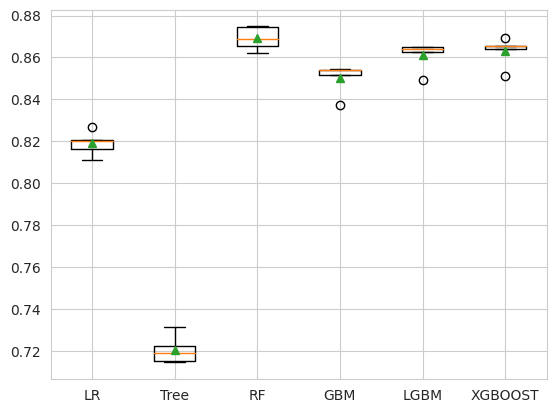

In [ ]:
plt.boxplot(x = results, labels = modelname, showmeans = True)
plt.show()

In [ ]:
# Stacking Model

from sklearn.ensemble import StackingClassifier

rf = RandomForestClassifier()

lgbm = LGBMClassifier()
xgb = XGBClassifier()

stack = StackingClassifier(estimators = [ ("xgb", xgb),
 ("LGBM", lgbm)],final_estimator = rf)

prediction = stack.fit(X, y).predict_proba(newtest)[:,1]

[LightGBM] [Info] Number of positive: 20534, number of negative: 54744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 75278, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272776 -> initscore=-0.980586
[LightGBM] [Info] Start training from score -0.980586
[LightGBM] [Info] Number of positive: 16427, number of negative: 43795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 60222, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272774 -> initscore=-0.980593
[Lig

In [ ]:
df=pd.DataFrame({'Patient_ID':test.Patient_ID,
              'Health_Camp_ID':test.Health_Camp_ID,
              'Outcome':prediction

              })

In [ ]:
df.to_csv('medcamp_new.csv',index=False)